# Hospital Demand Model

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('alldischarges_new.csv')

### Exploratory Data Analysis

In [37]:
df.head()

,SN,FinancialYear,Years,DHB,District,Sex,dSex,Age,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,Chapter,ICDChapter,Discharges,meanStay,TotalDischarges,singleDayDischarge
0,1,2013/14,2014,Northland,1100,Male,0,15,15-19,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,2,2.2,5,0
1,2,2013/14,2014,Auckland,100,Male,0,15,15-19,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0
2,3,2013/14,2014,Unknown,1600,Female,1,20,20-24,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,1.0,1,0
3,4,2013/14,2014,Auckland,100,Male,0,25,25-29,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0
4,5,2013/14,2014,Canterbury,300,Male,0,25,25-29,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0


In [38]:
df.describe()

,SN,Years,District,dSex,Age,Chapter,Discharges,meanStay,TotalDischarges,singleDayDischarge
count,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000,129353.000000
mean,64677.000000,2016.063601,889.945343,0.534661,48.280597,11.420307,3.675044,13.987407,576.866080,370.446685
std,37341.139023,1.411871,610.932462,0.498799,21.730559,4.745301,8.085573,59.583590,945.966636,868.548959
min,1.000000,2014.000000,100.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,32339.000000,2015.000000,300.000000,0.000000,30.000000,9.000000,1.000000,1.100000,48.000000,9.000000
50%,64677.000000,2016.000000,700.000000,1.000000,50.000000,11.000000,1.000000,1.600000,183.000000,68.000000
75%,97015.000000,2017.000000,1400.000000,1.000000,65.000000,14.000000,3.000000,3.300000,637.000000,271.000000
max,129353.000000,2018.000000,2100.000000,1.000000,85.000000,21.000000,284.000000,2009.000000,6723.000000,6377.000000


In [39]:
df.dtypes

SN                      int64
FinancialYear          object
Years                   int64
DHB                    object
District                int64
Sex                    object
dSex                    int64
Age                     int64
AgeGroup               object
ICDCode                object
ICDThreeChar           object
ICDSubgroup            object
Chapter                 int64
ICDChapter             object
Discharges              int64
meanStay              float64
TotalDischarges         int64
singleDayDischarge      int64
dtype: object

In [40]:
df['ICDCode'].nunique()

1123

In [41]:
df.corr()

,SN,Years,District,dSex,Age,Chapter,Discharges,meanStay,TotalDischarges,singleDayDischarge
SN,1.000000,0.979511,-0.002133,0.014038,-0.022705,0.188182,0.008424,-0.009367,0.010601,0.003526
Years,0.979511,1.000000,-0.002284,0.000004,-0.003177,-0.001158,0.001068,0.010702,-0.013853,-0.014500
District,-0.002133,-0.002284,1.000000,-0.011858,0.020330,0.008211,-0.057609,-0.005307,0.071492,0.056047
dSex,0.014038,0.000004,-0.011858,1.000000,-0.040787,0.034577,0.009134,0.036151,0.015082,0.009120
Age,-0.022705,-0.003177,0.020330,-0.040787,1.000000,-0.110761,0.038145,0.185559,0.026939,0.007108
Chapter,0.188182,-0.001158,0.008211,0.034577,-0.110761,1.000000,0.063679,-0.071483,0.180015,0.163731
Discharges,0.008424,0.001068,-0.057609,0.009134,0.038145,0.063679,1.000000,-0.036691,0.438058,0.406489
meanStay,-0.009367,0.010702,-0.005307,0.036151,0.185559,-0.071483,-0.036691,1.000000,-0.096088,-0.070610
TotalDischarges,0.010601,-0.013853,0.071492,0.015082,0.026939,0.180015,0.438058,-0.096088,1.000000,0.937075
singleDayDischarge,0.003526,-0.014500,0.056047,0.009120,0.007108,0.163731,0.406489,-0.070610,0.937075,1.000000


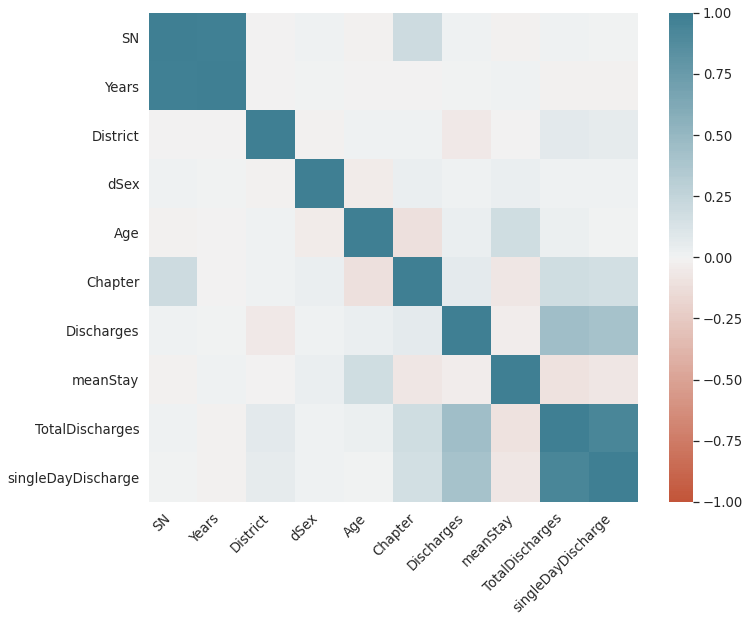

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [43]:
df['DHB'].value_counts()

Canterbury            15298
Auckland              11357
Waitemata             10681
Capital and Coast     10463
Southern               9934
Counties Manukau       9380
Bay of Plenty          7584
Waikato                6515
Hutt Valley            5910
Midcentral             5240
Hawke's Bay            5153
Northland              5062
Taranaki               5061
Unknown                5029
Nelson Marlborough     4027
Lakes                  3757
South Canterbury       3145
Wairarapa              2181
Whanganui              1581
West Coast             1200
Tairawhiti              795
Name: DHB, dtype: int64

In [44]:
# Re-usable plotting function
def plot_los_groupby(variable, size=(30,26)):
    ''' 
    Plot Median LOS by df categorical series name 
    '''
    results = df[[variable, 'meanStay']].groupby(variable).median().reset_index()
    values = list(results['meanStay'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.8)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Median Length of Stay (days)')
    ax.tick_params(left=False, top=False, right=False) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.layout()
    plt.show();
    
# Re-usable boxplot function
def boxplot_los_groupby(variable, los_range=(-1, 30), size=(30,26)):
    ''' 
    Boxplot of LOS by df categorical series name 
    '''
    results = df[[variable, 'meanStay']].groupby(variable).median().reset_index()

    categories = results[variable].values.tolist()
    

    hist_data = []
    for cat in categories:
        hist_data.append(df['meanStay'].loc[df[variable]==cat].values)

    fig, ax = plt.subplots(figsize=size)
    ax.boxplot(hist_data, 0, '', vert=False)
    ax.set_xlim(los_range)
    ax.tick_params(axis="x", labelsize=25)
    ax.set_yticklabels(categories, size=25)
    ax.set_xlabel('Length of Stay (days)', size=25)
    ax.tick_params(left=False, right=False) 
    ax.set_title('Comparison of Median LOS for {} categories'.format(variable), size=25)
    plt.tight_layout()
    plt.show();

# Visualizations 

#### DHB Versus Mean Stay

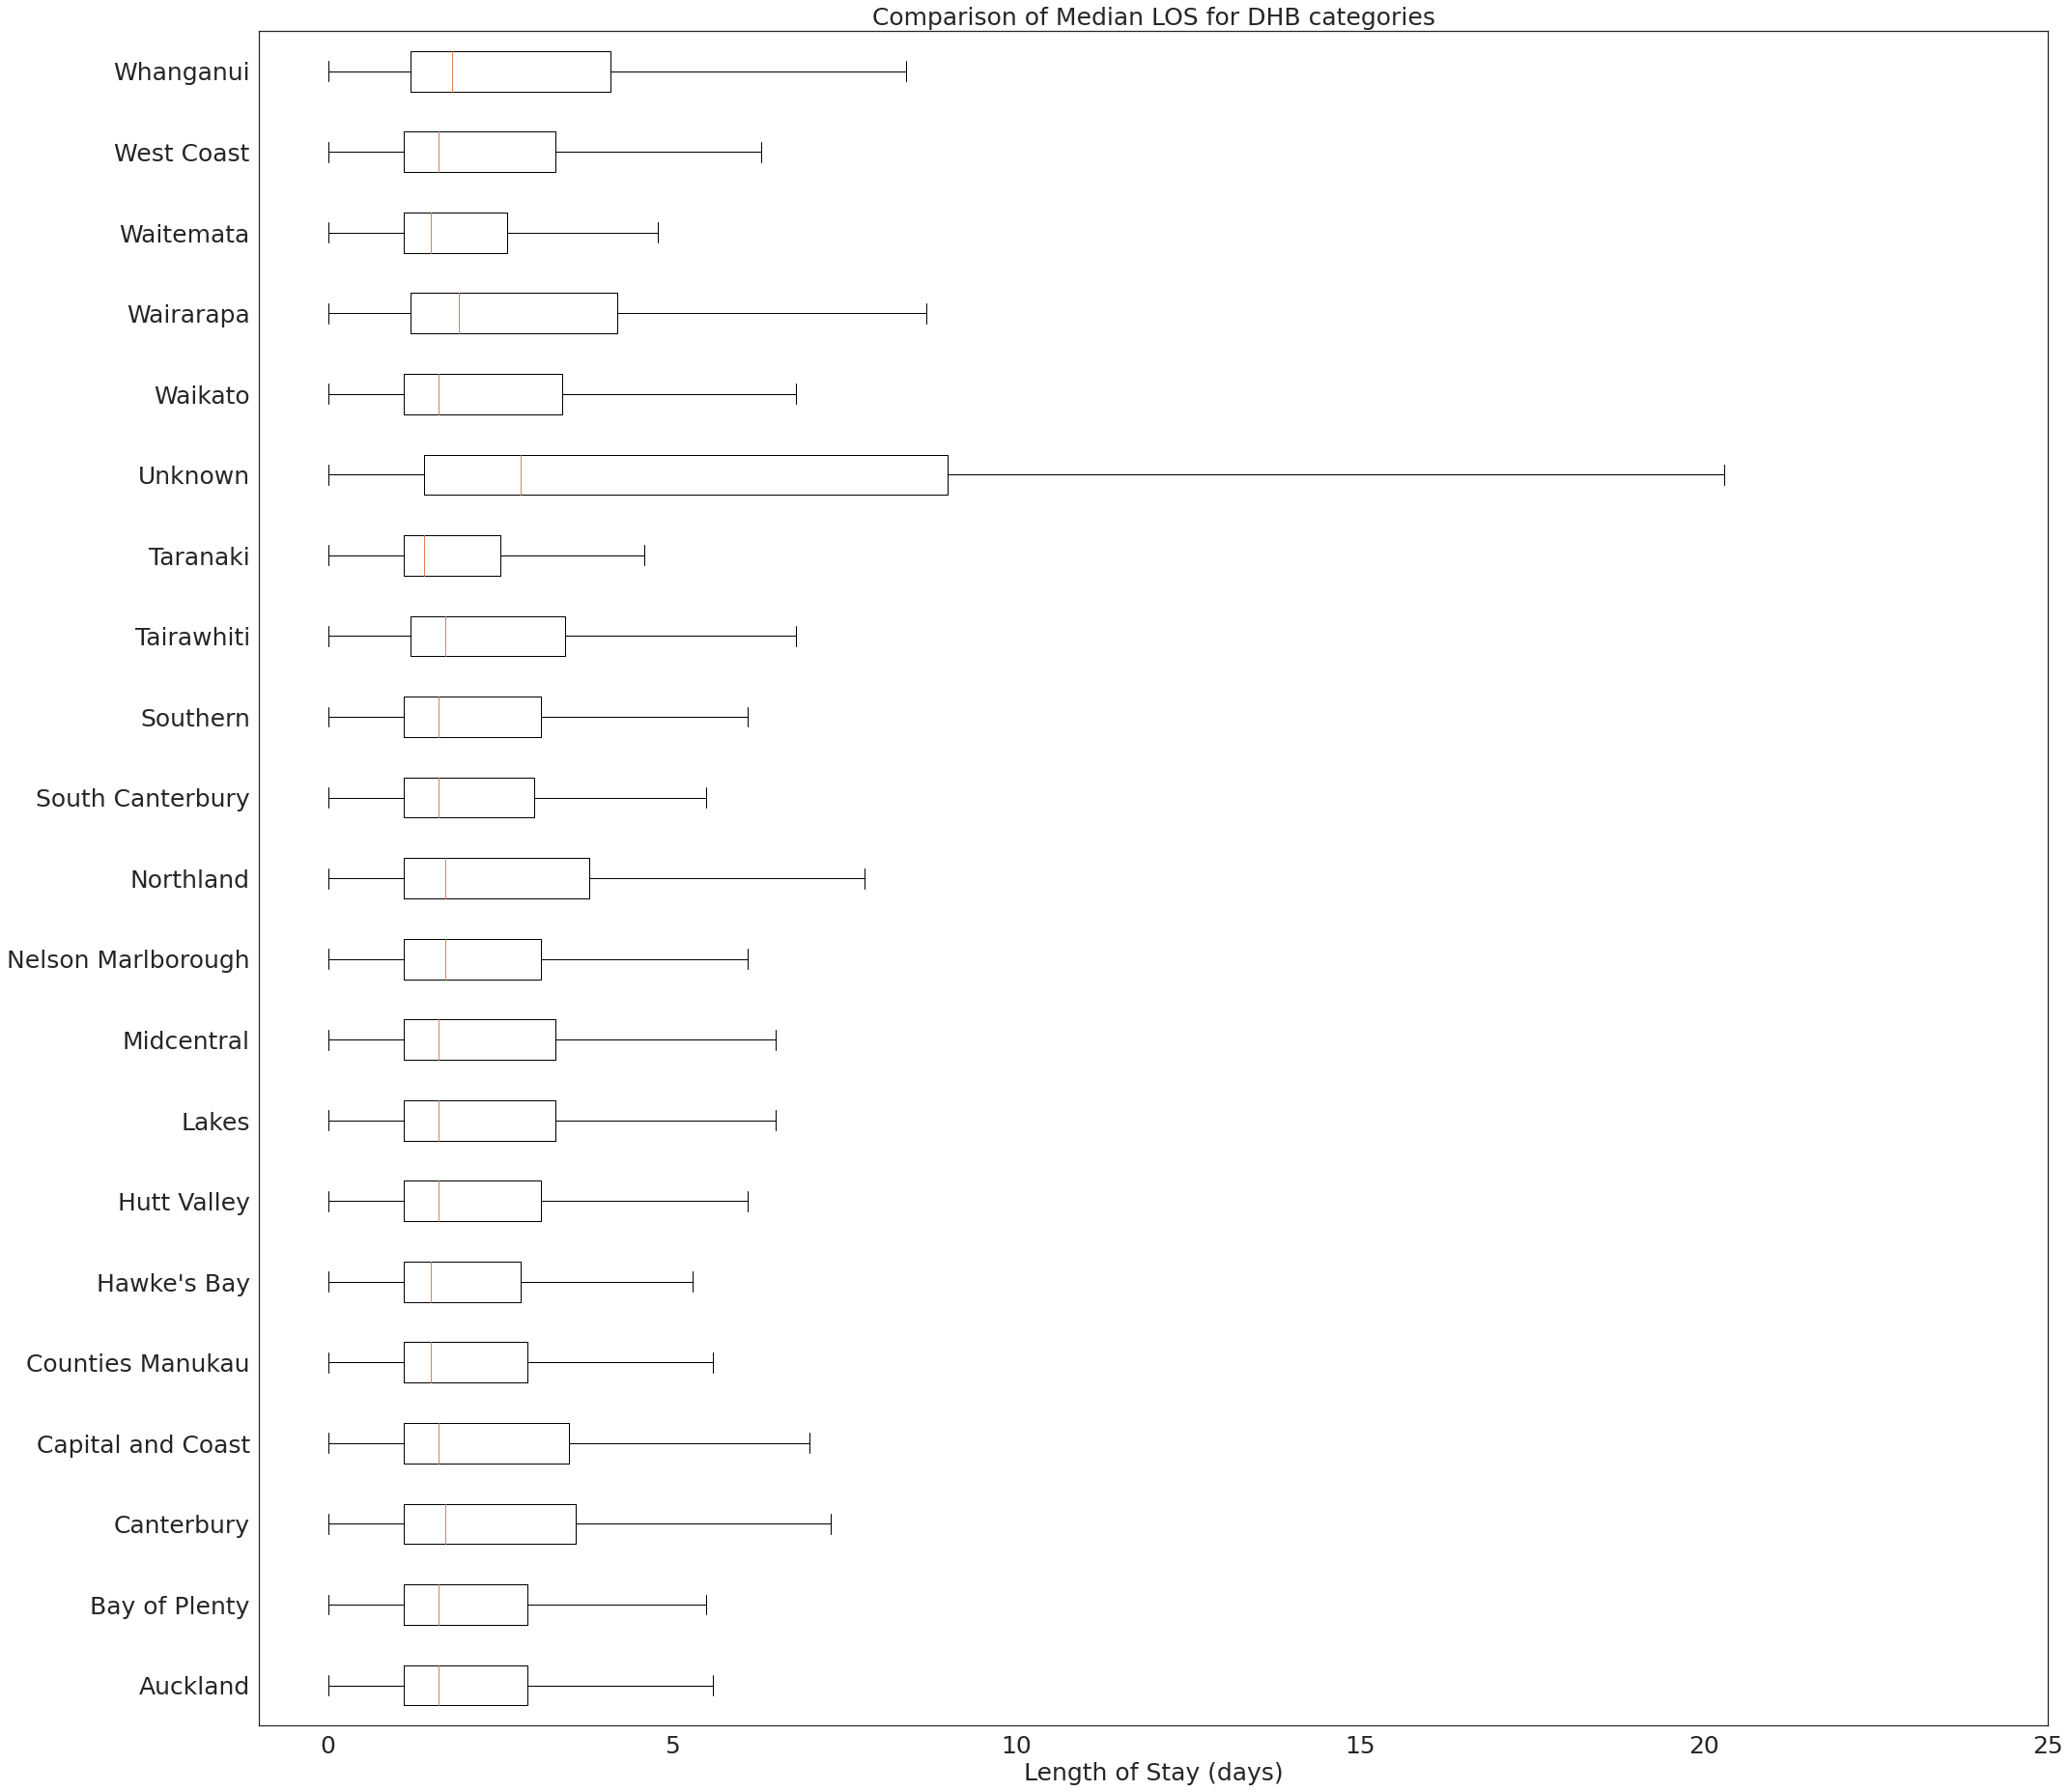

In [45]:
boxplot_los_groupby('DHB', los_range=(-1,25))

## DHB Versus Numbers Discharged

/root/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


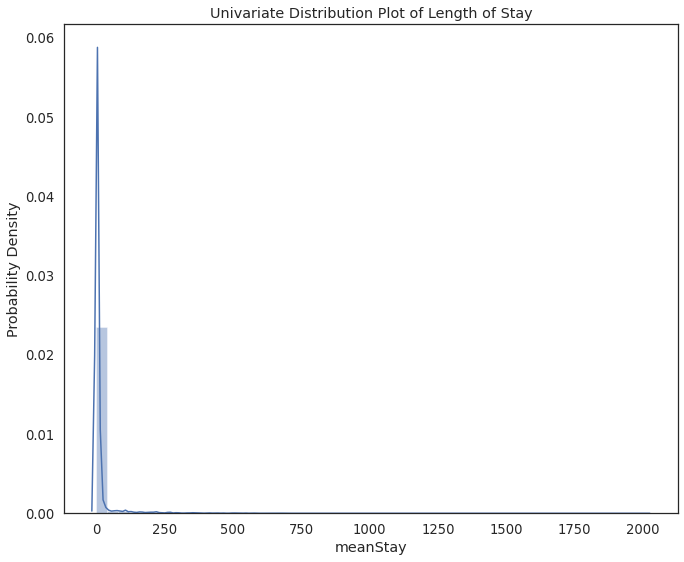

In [46]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['meanStay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

In [47]:
df.groupby(['Chapter','Years','District','dSex']).mad()['meanStay'].unstack()

dSex                            0          1
Chapter Years District                      
1       2014  100        5.541176   6.840816
              200        0.377778   0.528000
              300       67.882716  89.458333
              400       19.877551   6.212500
              500        2.250000  13.850000
...                           ...        ...
21      2018  1700       6.038089  19.072434
              1800       0.367347   0.147444
              1900       0.893878   0.788000
              2000       0.220408   0.097531
              2100      20.828125   0.106371

[1953 rows x 2 columns]

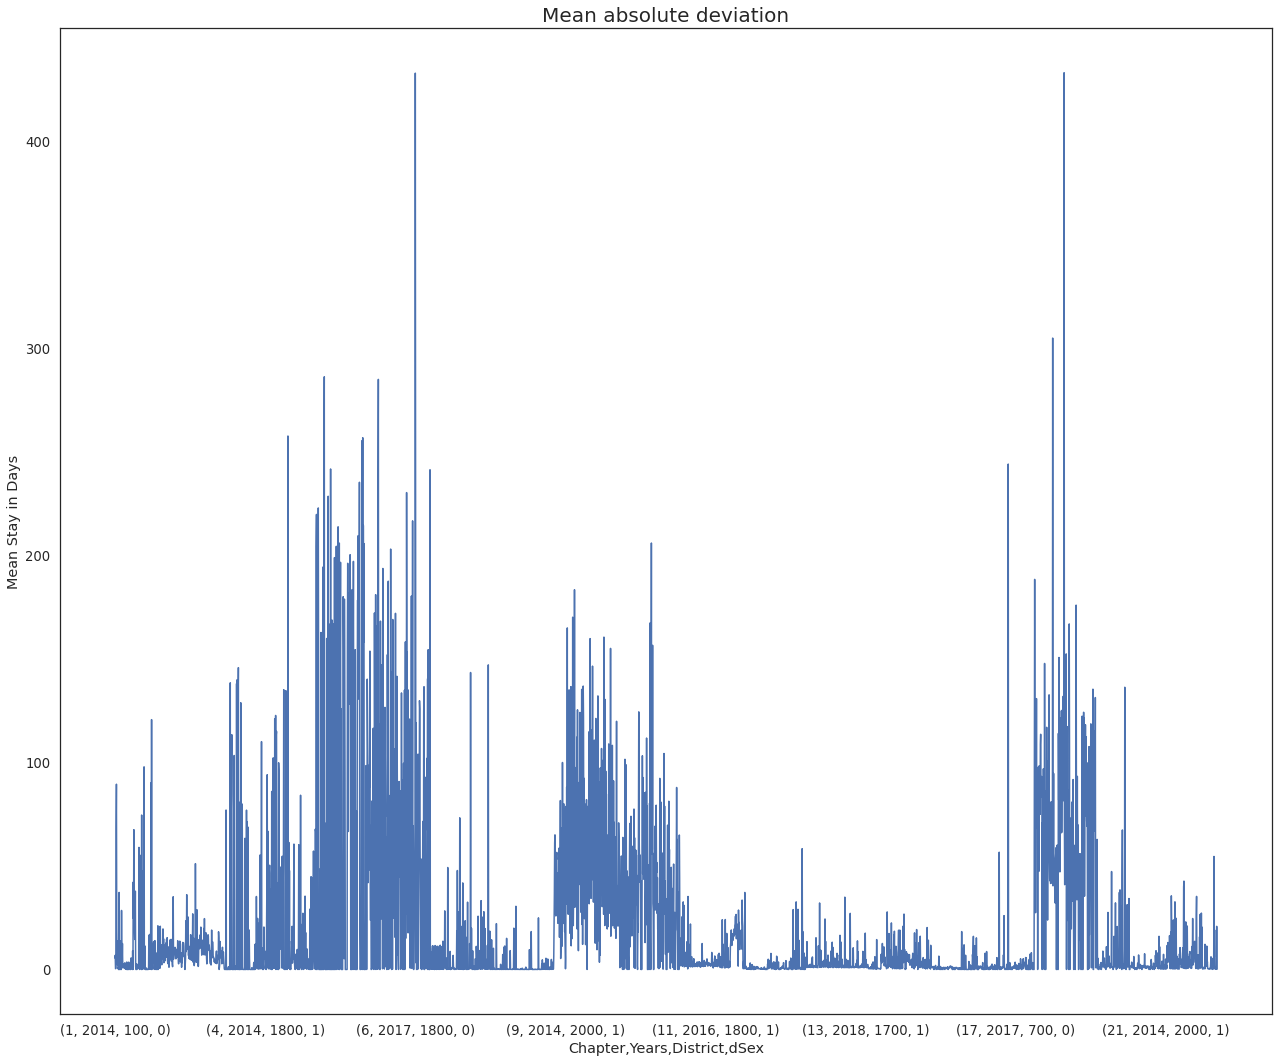

In [48]:
#Population Distribution by ChapterCode, Year, District and Sex - Plot by Mean Stay(Mean Absolute Deviation)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','District','dSex']).mad()['meanStay'].plot()
ax.set_title('Mean absolute deviation',size=20)
plt.ylabel('Mean Stay in Days')
plt.tight_layout()
plt.show()

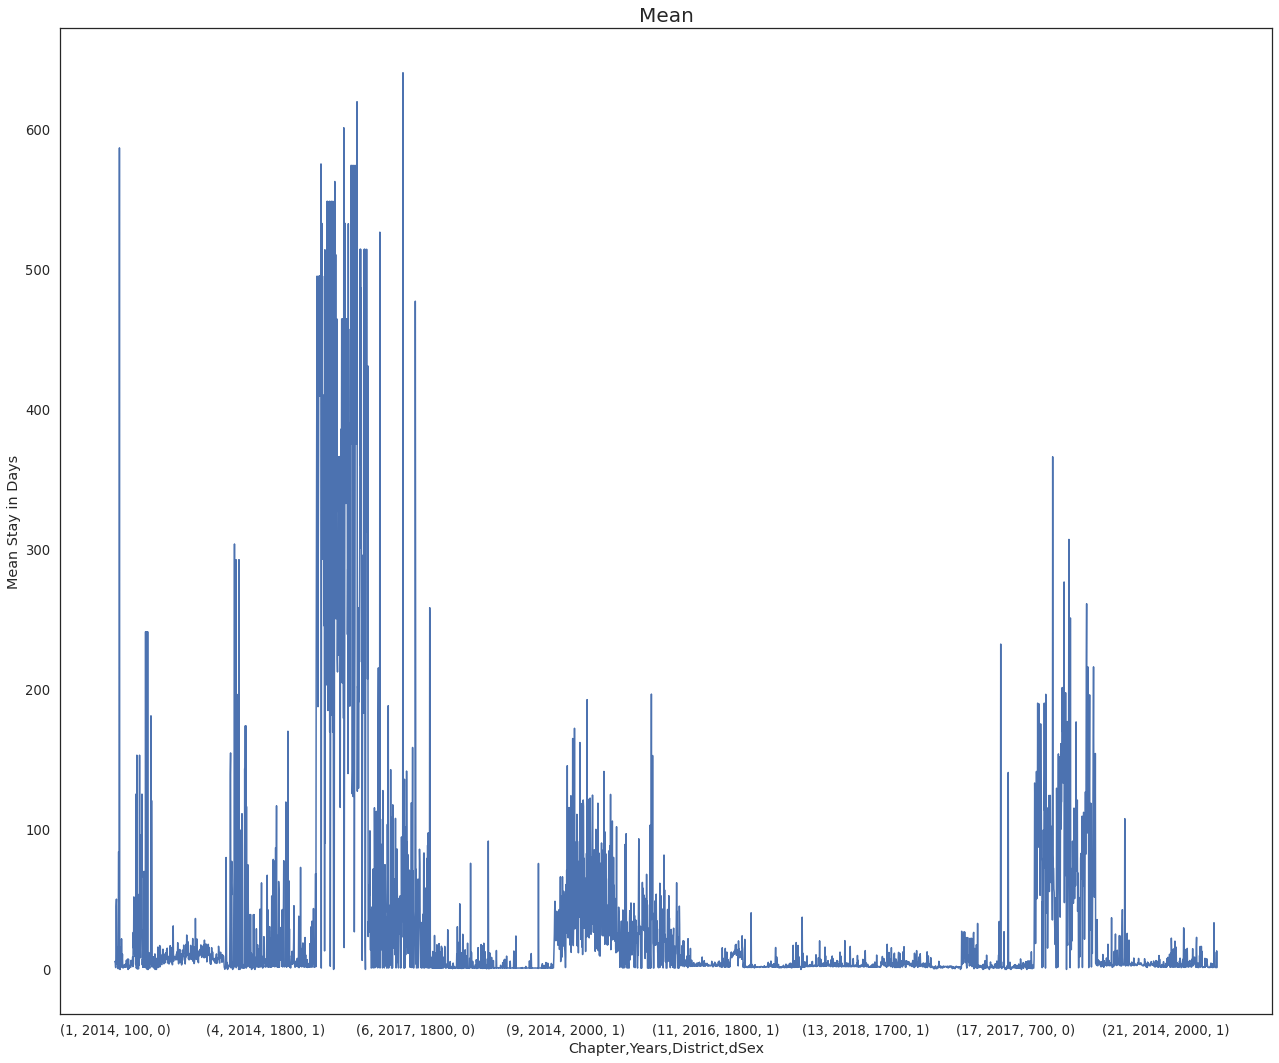

In [49]:
#Population Distribution by ChapterCode, Year, District and Sex - Plot by Mean Stay(Mean)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','District','dSex']).mean()['meanStay'].plot()
ax.set_title('Mean',size=20)
plt.ylabel('Mean Stay in Days')
plt.tight_layout()
plt.show()

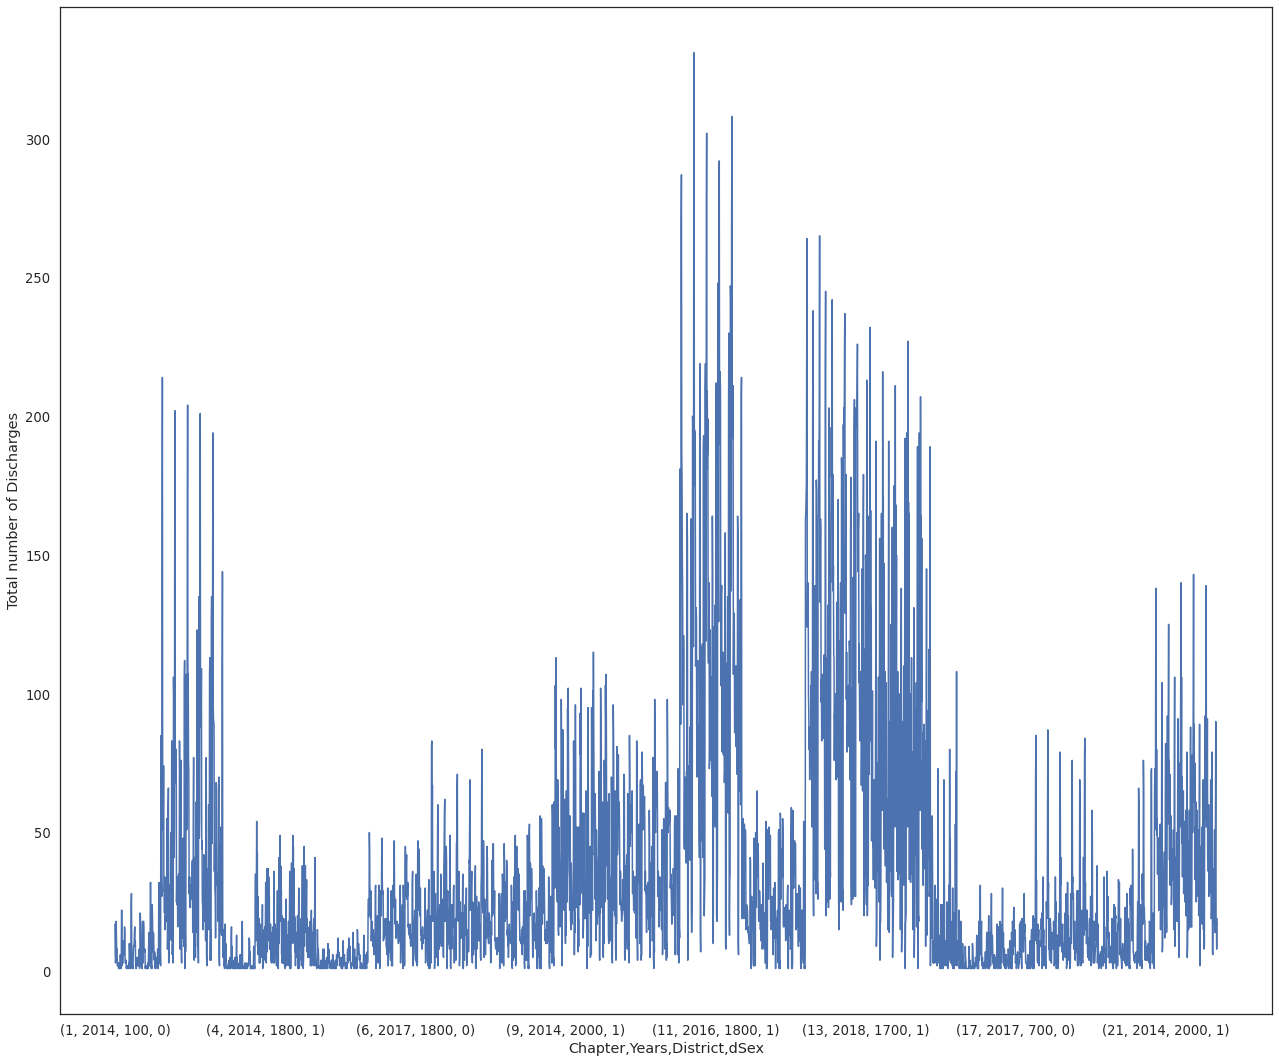

In [50]:
#Population Distribution by ChapterCode, Year, District and Sex - Plot by Discharges(Count)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','District','dSex']).count()['Discharges'].plot()
#ax.set_title('Mean',size=20)
plt.ylabel('Total number of Discharges')
plt.tight_layout()
plt.show()

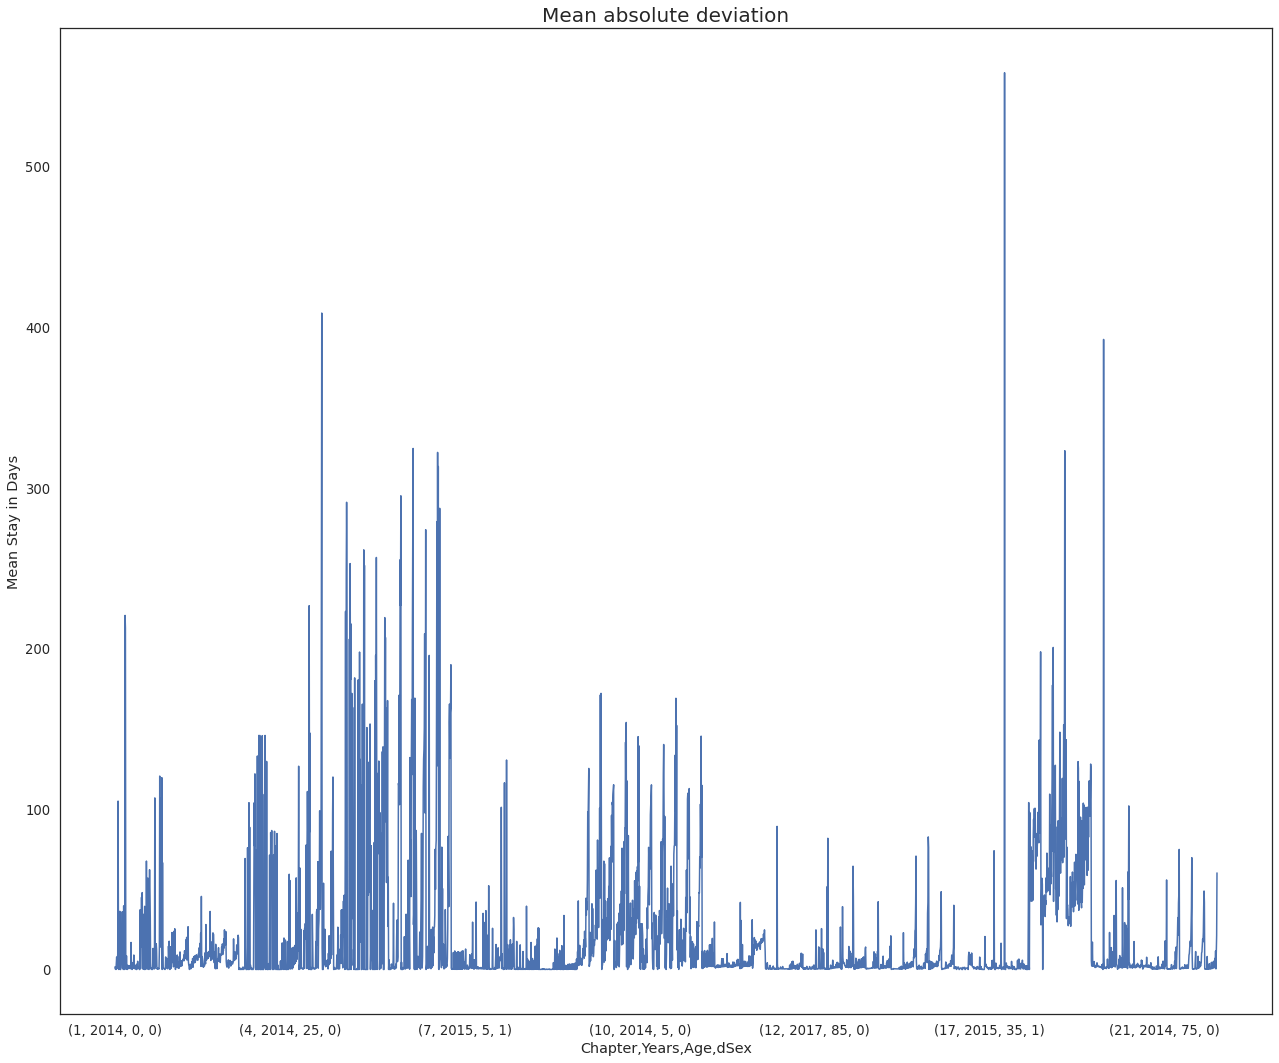

In [51]:
#Population Distribution by ChapterCode, Year, Age and Sex - Plot by Mean Stay(Mean Absolute Deviation)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','Age','dSex']).mad()['meanStay'].plot()
ax.set_title('Mean absolute deviation',size=20)
plt.ylabel('Mean Stay in Days')
plt.tight_layout()
plt.show()

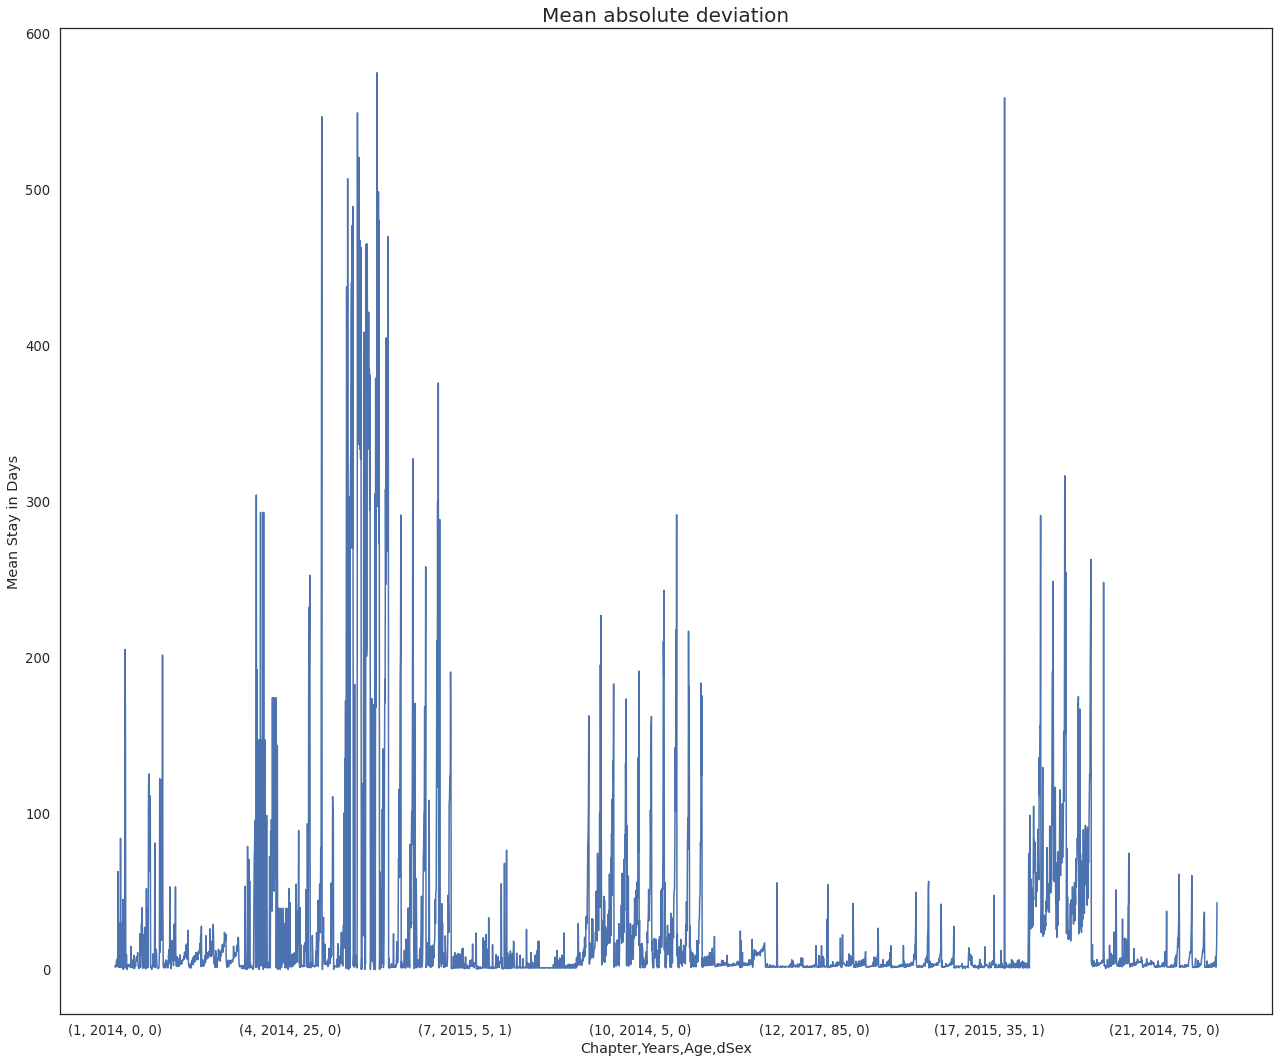

In [52]:
#Population Distribution by ChapterCode, Year, Age and Sex - Plot by Mean Stay(Mean)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','Age','dSex']).mean()['meanStay'].plot()
ax.set_title('Mean absolute deviation',size=20)
plt.ylabel('Mean Stay in Days')
plt.tight_layout()
plt.show()

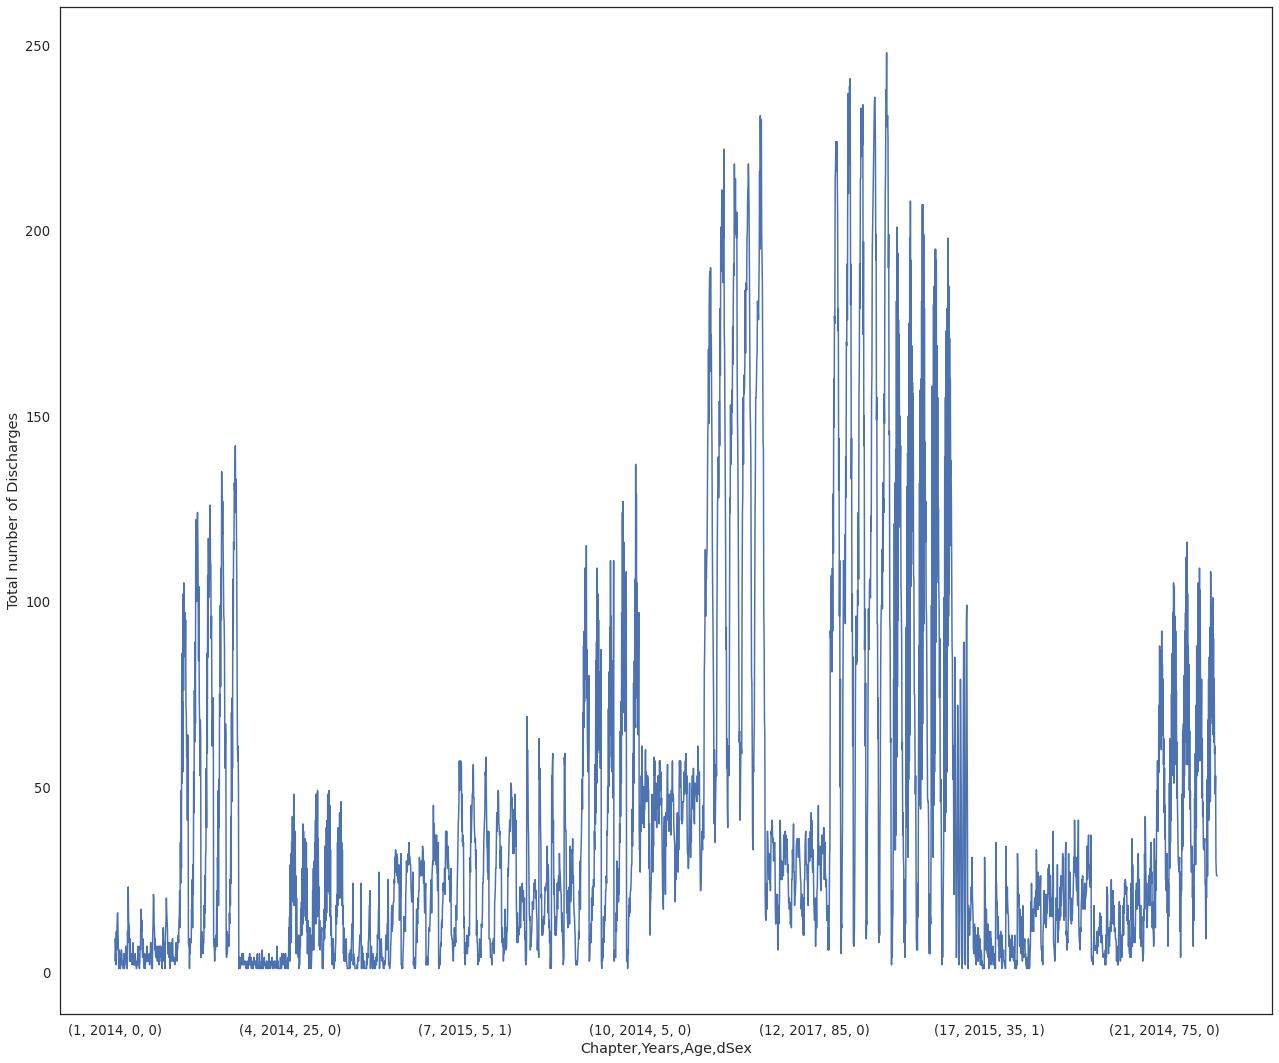

In [53]:
#Population Distribution by ChapterCode, Year, District and Sex - Plot by Discharges(Count)
f, ax = plt.subplots(figsize=(18, 15))
df.groupby(['Chapter','Years','Age','dSex']).count()['Discharges'].plot()
#ax.set_title('Mean',size=20)
plt.ylabel('Total number of Discharges')
plt.tight_layout()
plt.show()

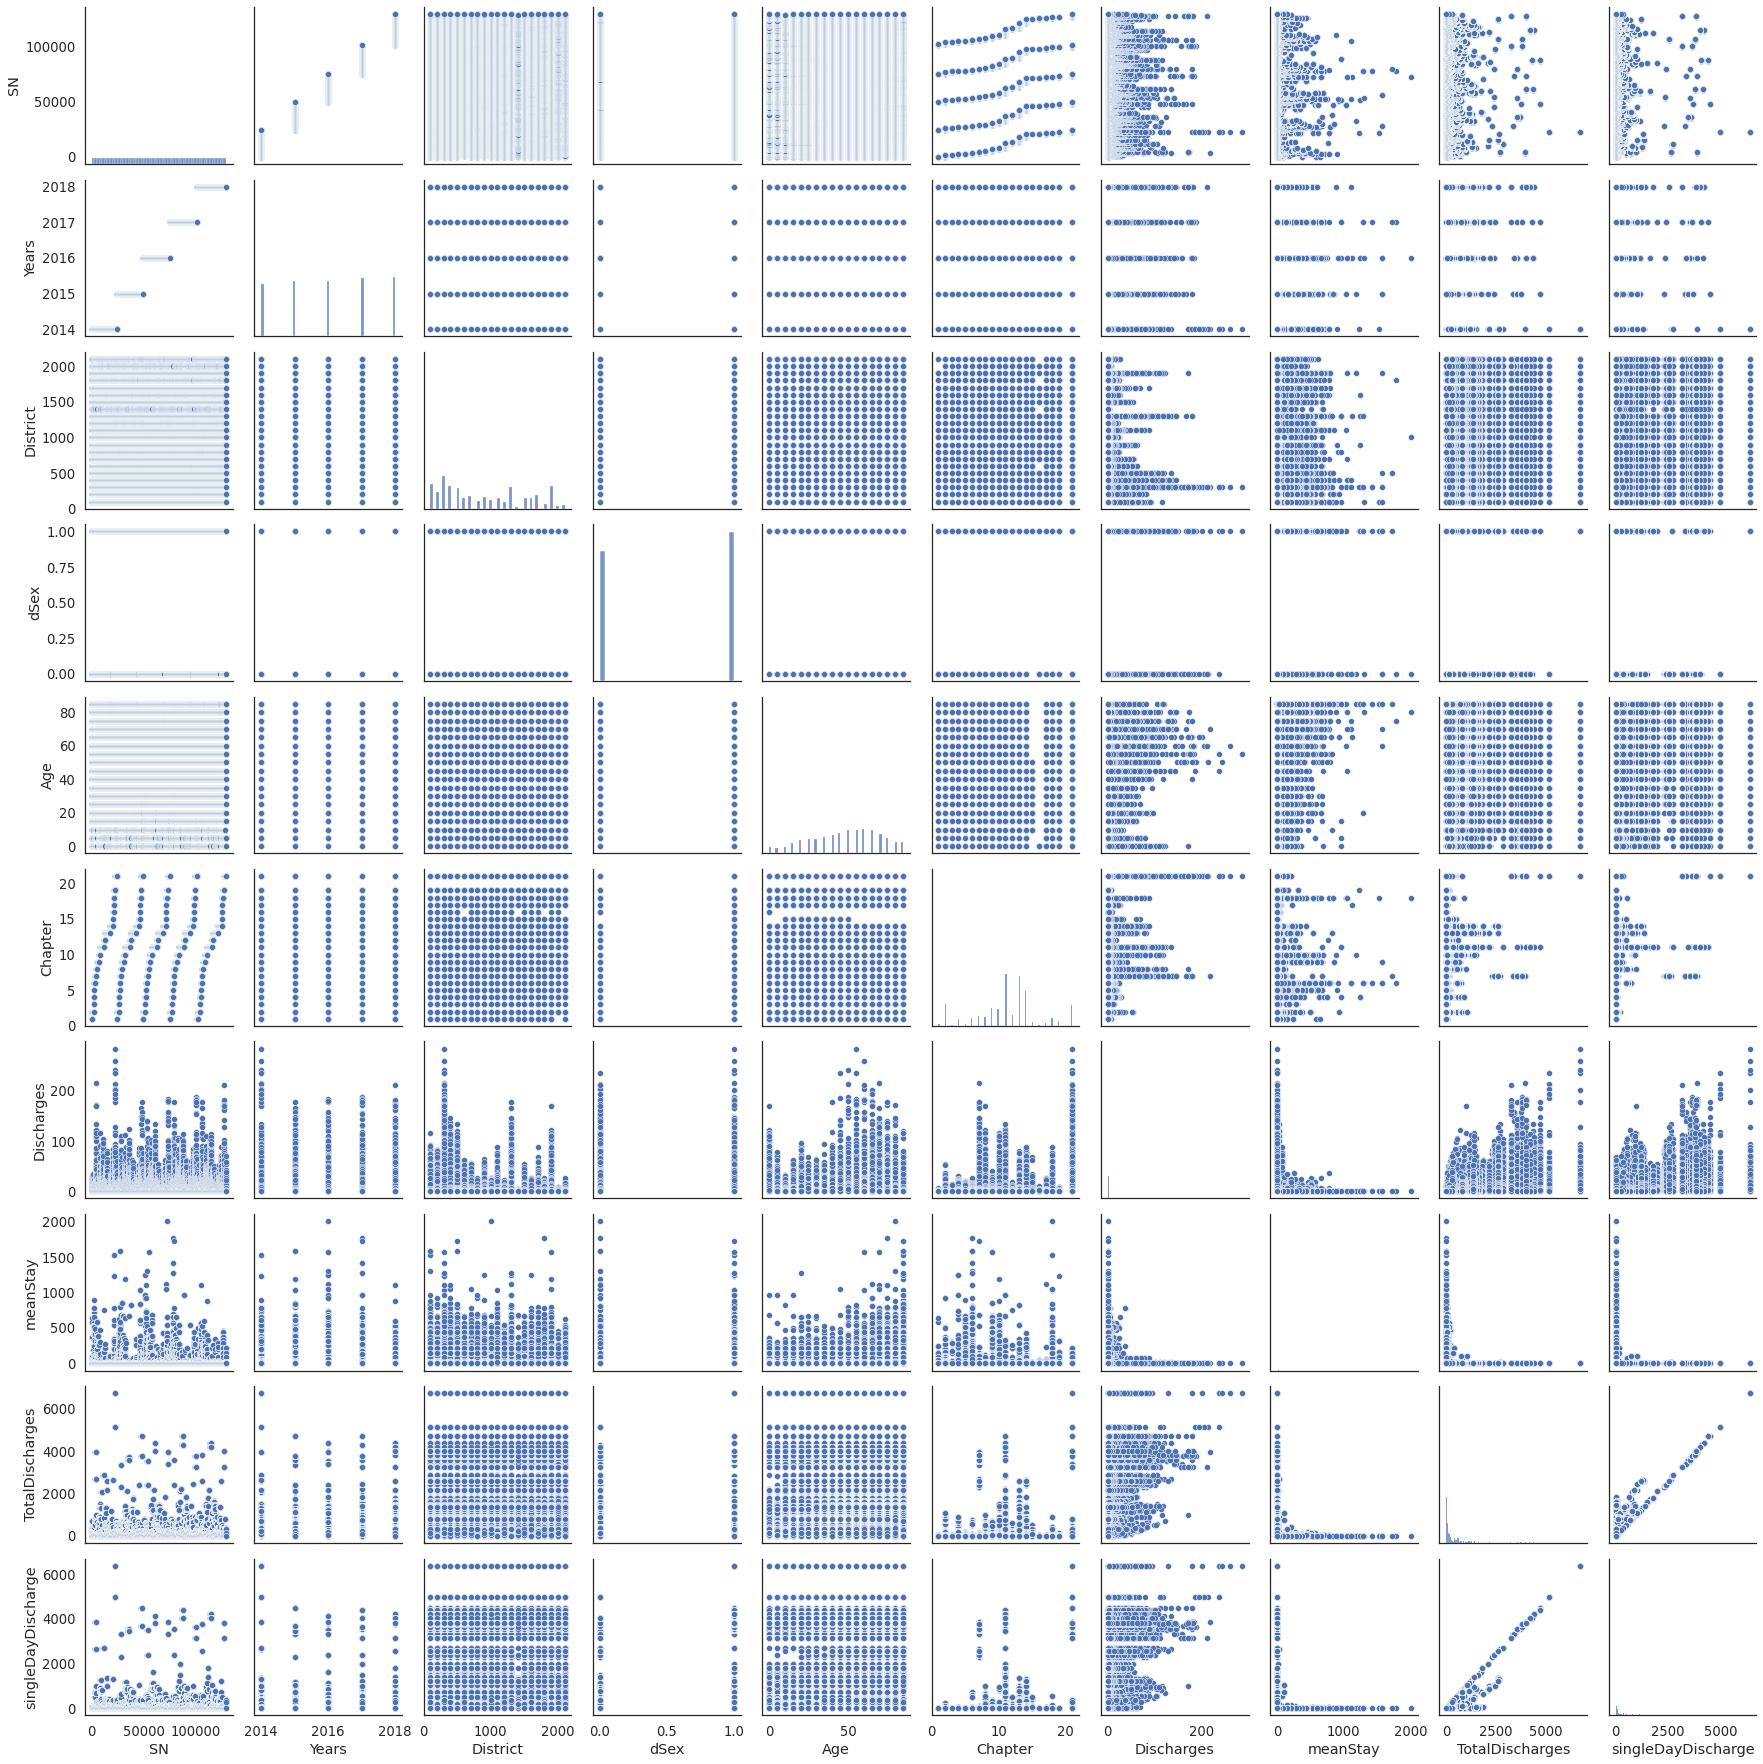

In [54]:
sns.pairplot(df)

/root/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='meanStay', ylabel='Density'>

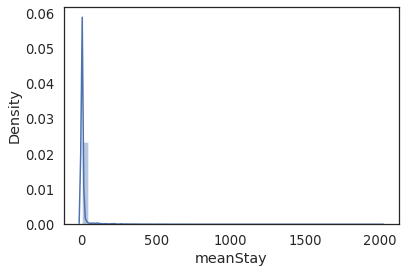

In [55]:
sns.distplot(df['meanStay'])

/root/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Discharges', ylabel='Density'>

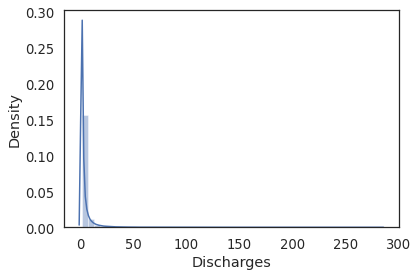

In [56]:
sns.distplot(df['Discharges'])

## Linear Regression

In [93]:
df

,SN,FinancialYear,Years,DHB,District,Sex,dSex,Age,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,Chapter,ICDChapter,Discharges,meanStay,TotalDischarges,singleDayDischarge
0,1,2013/14,2014,Northland,1100,Male,0,15,15-19,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,2,2.2,5,0
1,2,2013/14,2014,Auckland,100,Male,0,15,15-19,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0
2,3,2013/14,2014,Unknown,1600,Female,1,20,20-24,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,1.0,1,0
3,4,2013/14,2014,Auckland,100,Male,0,25,25-29,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0
4,5,2013/14,2014,Canterbury,300,Male,0,25,25-29,A01,A01 Typhoid and paratyphoid fevers,A00-A09 Intestinal infectious diseases,1,A00-B99 Certain infectious and parasitic diseases,1,2.2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129348,129349,2017/18,2018,Southern,1300,Female,1,75,75-79,Z76,Z76 Persons encountering health services in ot...,Z70-Z76 Persons encountering health services i...,21,Chapter 21 Factors influencing health status a...,1,1.3,312,25
129349,129350,2017/18,2018,Hawke's Bay,600,Male,0,75,75-79,Z76,Z76 Persons encountering health services in ot...,Z70-Z76 Persons encountering health services i...,21,Chapter 21 Factors influencing health status a...,1,1.5,126,10
129350,129351,2017/18,2018,Canterbury,300,Male,0,80,80-84,Z76,Z76 Persons encountering health services in ot...,Z70-Z76 Persons encountering health services i...,21,Chapter 21 Factors influencing health status a...,1,1.5,126,10
129351,129352,2017/18,2018,Lakes,800,Female,1,40,40-44,Z84,Z84 Family history of other conditions,Z80-Z99 Persons with potential health hazards ...,21,Chapter 21 Factors influencing health status a...,1,0.0,2,2


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import joblib

X = df.drop(['meanStay','SN','FinancialYear','DHB','Sex','AgeGroup','ICDCode','ICDThreeChar','ICDSubgroup','ICDChapter'], axis=1) #remove data leakage features
print(X)
y = df['meanStay']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

        Years  District  dSex  Age  Chapter  Discharges  TotalDischarges  \
0        2014      1100     0   15        1           2                5   
1        2014       100     0   15        1           1                5   
2        2014      1600     1   20        1           1                1   
3        2014       100     0   25        1           1                5   
4        2014       300     0   25        1           1                5   
...       ...       ...   ...  ...      ...         ...              ...   
129348   2018      1300     1   75       21           1              312   
129349   2018       600     0   75       21           1              126   
129350   2018       300     0   80       21           1              126   
129351   2018       800     1   40       21           1                2   
129352   2018       800     1   75       21           1                2   

        singleDayDischarge  
0                        0  
1                        0  


In [58]:
#Linear Regression
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

# Create the Linear Regression model
model = LinearRegression()
# Create the Linear Regression model
#model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [59]:
##Get the statistic from the model

print(model.intercept_)
model.coef_

-1040.1716558272833


array([ 5.13775907e-01,  1.13486629e-05,  6.05945258e+00,  5.32967034e-01,
       -4.45871910e-01, -3.27390466e-03, -1.76996644e-02,  1.34287170e-02])

In [60]:
X_train.columns

Index(['Years', 'District', 'dSex', 'Age', 'Chapter', 'Discharges',
       'TotalDischarges', 'singleDayDischarge'],
      dtype='object')

In [61]:
cdf = pd.DataFrame(model.coef_, X_train.columns, columns=['Coeff'])

In [62]:
cdf

,Coeff
Years,0.513776
District,0.000011
dSex,6.059453
Age,0.532967
Chapter,-0.445872
Discharges,-0.003274
TotalDischarges,-0.017700
singleDayDischarge,0.013429


In [63]:
# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'linreg.pkl')

# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Model training results:
 - Training Set Error: 23.13831314674559
 - Test Set Error: 22.47709436553549


In [65]:
predictions = model.predict(X_test)

In [66]:
predictions

array([-1.72408165, 29.54371652, 16.87743619, ..., 29.41962393,
       20.46750131, 18.74568865])

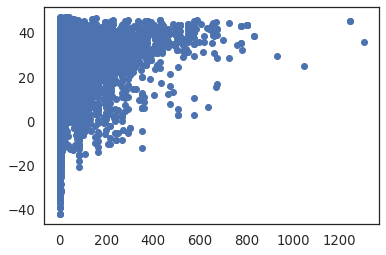

In [67]:
plt.scatter(y_test,predictions)

## GradientBoosting

In [68]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'gradboost.pkl')

# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Model training results:
 - Training Set Error: 13.113939737603951
 - Test Set Error: 12.715251482952329


In [69]:
predictions = model.predict(X_test)

In [70]:
predictions

array([2.78988829, 5.71801758, 8.85662064, ..., 7.00427995, 4.35508812,
       8.7085365 ])

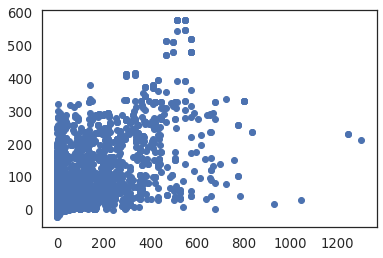

In [71]:
plt.scatter(y_test,predictions)

## RandomForestRegressor


In [76]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

model = RandomForestRegressor(random_state = 0)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'gsgdr.pkl')

# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Model training results:
 - Training Set Error: 1.7864831791876312
 - Test Set Error: 4.40329001645084


In [77]:
predictions = model.predict(X_test)

In [78]:
predictions

array([ 1.8  ,  8.326, 24.003, ...,  1.651,  8.206,  1.3  ])

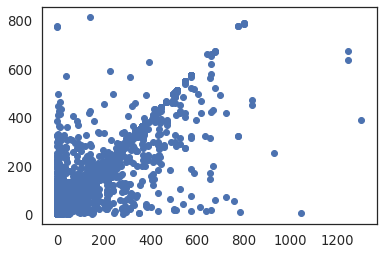

In [79]:
plt.scatter(y_test,predictions)

## KNeighborsRegressor

In [80]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

model = KNeighborsRegressor()

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'kneigbours.pkl')

# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Model training results:
 - Training Set Error: 10.684225429887242
 - Test Set Error: 13.01437561201876


In [81]:
predictions = model.predict(X_test)

In [82]:
predictions 

array([1.8 , 4.26, 1.18, ..., 2.66, 9.18, 1.16])

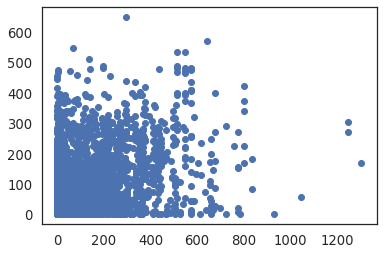

In [83]:
plt.scatter(y_test,predictions)

## SGDRegressor

In [89]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

model = SGDRegressor(random_state = 0)

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it to make predictions later
joblib.dump(model, 'sgdr2.pkl')

# Report how well the model is performing
print("Model training results:")

# Report an error rate on the training set
mse_train = mean_absolute_error(y_train, model.predict(X_train))
print(f" - Training Set Error: {mse_train}")

# Report an error rate on the test set
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print(f" - Test Set Error: {mse_test}")

Model training results:
 - Training Set Error: 297055357894500.06
 - Test Set Error: 291988987972984.44


In [90]:
predictions = model.predict(X_test)

In [91]:
predictions 

array([ 1.92933166e+15, -1.57416218e+14, -1.44286830e+14, ...,
        8.85279697e+13, -1.60228229e+14, -2.95245286e+14])

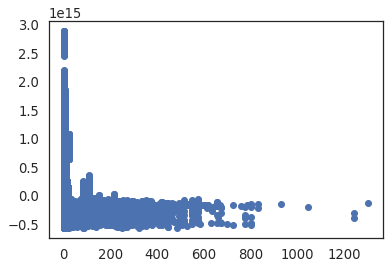

In [92]:
plt.scatter(y_test,predictions)

In [ ]:
lengthStay = model.predict(stay)

predicted_value = lengthStay[0]

In [ ]:
stay = [
    patient
]

In [ ]:
print(predicted_value)

In [ ]:
patient = [2018, 900, 0, 65, 21, 1, 126, 10 ]

In [ ]:
patient = [2018,500,1,70,21,1,312,25]

In [ ]:
stay = [
    patient
]

In [ ]:
lengthStay = model.predict(stay)

predicted_value = lengthStay[0]

In [ ]:
print(predicted_value)

In [ ]:
patient = [2018, 1300, 1, 75, 21, 1, 312, 25]

In [ ]:
stay = [
    patient
]

In [ ]:
lengthStay = model.predict(stay)

predicted_value = lengthStay[0]

In [ ]:
print(predicted_value)

## Aggregate Models from all Algorithms 


In [ ]:
# Regression models for comparison
models = [(random_state = 0), 
          GradienSGDRegressortBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import joblib

# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create the Linear Regression model
#model = LinearRegression()
# Create the Linear Regression model
#model = GradientBoostingRegressor()

# Train the model
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

In [ ]:
print(results.values())

In [ ]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('../images/cnn_rnn_model.png', bbox_inches = 'tight')

In [ ]:
# GradientBoostingRegressor will be used as the LOS prediction model
reg_model = SGDRegressor(random_state = 0) 
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined))